In [26]:
from fredapi import Fred
import matplotlib.pyplot as plt
import pandas
import numpy as np
import seaborn as sn

/Users/ericpei/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [27]:
%matplotlib inline

In [8]:
with open ("api_key", "r") as myfile:
    key=myfile.readline()

In [12]:
fred = Fred(api_key=key)

In [17]:
SP500 = fred.get_series('SP500')

In [41]:
SP500[:1]

2006-06-09    1252.3
dtype: float64

In [42]:
start_date = '2006-06-09'

### Kinda worthless, so little data

##### Downloaded info from here: https://finance.yahoo.com/q/hp?s=%5EGSPC+Historical+Prices

In [68]:
SP500 = pd.read_csv('table.csv')

In [70]:
SP500.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
16713,1950-01-09,17.08,17.08,17.08,17.08,2520000,17.08
16714,1950-01-06,16.98,16.98,16.98,16.98,2010000,16.98
16715,1950-01-05,16.93,16.93,16.93,16.93,2550000,16.93
16716,1950-01-04,16.85,16.85,16.85,16.85,1890000,16.85
16717,1950-01-03,16.66,16.66,16.66,16.66,1260000,16.66


In [108]:
SP500['Date'] = pd.to_datetime(SP500['Date'])

In [135]:
SP500['YearMonth'] = SP500['Date'].map(lambda x: 1000*x.year + x.month)
## Check dateutil is broken

In [149]:
SP500_monthly = SP500.groupby(['YearMonth']).last()
SP500_monthly = SP500_monthly.set_index(['Date'])
SP500_monthly[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000
1950-02-01,17.049999,17.049999,17.049999,17.049999,1810000,17.049999
1950-03-01,17.240000,17.240000,17.240000,17.240000,1410000,17.240000
1950-04-03,17.530001,17.530001,17.530001,17.530001,1570000,17.530001
1950-05-01,18.219999,18.219999,18.219999,18.219999,2390000,18.219999


In [150]:
start_date = SP500['Date'].iloc[-1]
start_date

Timestamp('1950-01-03 00:00:00')

### Construction Spending

In [205]:
CON_SPEND = fred.get_series_first_release('TTLCONS')
CON_SPEND = CON_SPEND.loc[start_date:]
CON_SPEND[:5]
CON_SPEND.tail()

date
2015-12-01    1.11657e+06
2016-01-01    1.14084e+06
2016-02-01    1.14397e+06
2016-03-01    1.13749e+06
2016-04-01    1.13393e+06
Name: value, dtype: object

### Retail Sales Index

In [204]:
RET_SALES_IND = fred.get_series_first_release('RSXFS')
RET_SALES_IND = RET_SALES_IND.loc[start_date:]
RET_SALES_IND[:5]
RET_SALES_IND.tail()

date
2015-12-01    394392
2016-01-01    396376
2016-02-01    393591
2016-03-01    393137
2016-04-01    399320
Name: value, dtype: object

### ADP National Employment Report (unemployment)

In [153]:
ADP_NER = fred.get_series_first_release('UNRATE')
ADP_NER = ADP_NER.loc[start_date:]
ADP_NER[:5]

date
1950-02-01    6.4
1950-03-01    6.3
1950-04-01      6
1950-05-01    5.7
1950-06-01    5.3
Name: value, dtype: object

### New orders durable goods

In [206]:
DGORDER = fred.get_series_first_release('DGORDER')
DGORDER = DGORDER.loc[start_date:]
DGORDER[:5]

date
1958-02-01    12026
1958-03-01    12630
1958-04-01    11836
1958-05-01    12380
1958-06-01    13399
Name: value, dtype: object

### Manufacturers Shipments. Inventories, Orders

In [208]:
AMTMVS = fred.get_series_first_release('AMTMVS')
AMTMVS = AMTMVS.loc[start_date:]
AMTMVS[:5]

date
1992-01-01    227886
1992-02-01    228960
1992-03-01    238575
1992-04-01    239888
1992-05-01    243627
Name: value, dtype: object

### Trade balance

In [209]:
BOPGSTB = fred.get_series_first_release('BOPGSTB')
BOPGSTB = BOPGSTB.loc[start_date:]
BOPGSTB[:5]

date
1992-01-01   -2031
1992-02-01      35
1992-03-01   -1794
1992-04-01   -2643
1992-05-01   -4194
Name: value, dtype: object

### Total Consumer Credit

In [210]:
TOTALSL = fred.get_series_first_release('TOTALSL')
TOTALSL = TOTALSL.loc[start_date:]
TOTALSL[:5]

date
1950-02-01    19.4
1950-03-01    19.8
1950-04-01    20.1
1950-05-01    20.6
1950-06-01    21.2
Name: value, dtype: object

### PMI (purchasing managers index)

In [211]:
NAPM = fred.get_series_first_release('NAPM')
NAPM = NAPM.loc[start_date:]
NAPM[:5]

date
1950-02-01    60.5
1950-03-01    62.1
1950-04-01    68.1
1950-05-01    74.7
1950-06-01    76.6
Name: value, dtype: object

### Total Job Openings Nonfarm

In [212]:
JTSJOL = fred.get_series_first_release('JTSJOL')
JTSJOL = JTSJOL.loc[start_date:]
JTSJOL[:5]

date
2000-12-01    5111
2001-01-01    5082
2001-02-01    4885
2001-03-01    4992
2001-04-01    4803
Name: value, dtype: object

### Value of manufacturers inventories

In [213]:
UMTMTI = fred.get_series_first_release('UMTMTI')
UMTMTI = UMTMTI.loc[start_date:]
UMTMTI[:5]

date
1992-01-01    375389
1992-02-01    378146
1992-03-01    377223
1992-04-01    379047
1992-05-01    380525
Name: value, dtype: object

### Consumer Price Index

In [214]:
CPI = fred.get_series_first_release('CPIAUCSL')
CPI = CPI.loc[start_date:]
CPI[:5]

date
1950-02-01    23.61
1950-03-01    23.64
1950-04-01    23.65
1950-05-01    23.77
1950-06-01    23.88
Name: value, dtype: object

### Consumer Sentiment

In [215]:
UMCSENT = fred.get_series_first_release('UMCSENT')
UMCSENT = UMCSENT.loc[start_date:]
UMCSENT[:5]

date
1952-11-01    86.2
1953-02-01    90.7
1953-08-01    80.8
1953-11-01    80.7
1954-02-01      82
Name: value, dtype: object

### Producer Price Index

In [216]:
PPIACO = fred.get_series_first_release('PPIACO')
PPIACO = PPIACO.loc[start_date:]
PPIACO[:5]

date
1950-02-01    26.1
1950-03-01    26.1
1950-04-01    26.1
1950-05-01    26.4
1950-06-01    26.6
Name: value, dtype: object

### Real Earnings

In [217]:
RLEARN = fred.get_series_first_release('LES1252881600Q')
RLEARN = RLEARN.loc[start_date:]
RLEARN[:5]

date
1979-01-01    335
1979-04-01    335
1979-07-01    330
1979-10-01    326
1980-01-01    321
Name: value, dtype: object

### Housing Starts

In [218]:
HOUST = fred.get_series_first_release('HOUST')
HOUST = HOUST.loc[start_date:]
HOUST[:5]

date
1959-01-01    1533
1959-02-01    1546
1959-03-01    1598
1959-04-01    1613
1959-05-01    1597
Name: value, dtype: object

### Retail Sales Seasonally Adjusted

In [219]:
RSXFS = fred.get_series_first_release('RSXFS')
RSXFS = RSXFS.loc[start_date:]
RSXFS[:5]

date
1992-01-01    150216
1992-02-01    150809
1992-03-01    150201
1992-04-01    151290
1992-05-01    152064
Name: value, dtype: object

### Home Inventories

In [220]:
MSACSR = fred.get_series_first_release('MSACSR')
MSACSR = MSACSR.loc[start_date:]
MSACSR[:5]

date
1963-01-01    4.7
1963-02-01    6.6
1963-03-01    6.4
1963-04-01    5.3
1963-05-01    5.1
Name: value, dtype: object

### 4 Week Moving Average of Initial Jobless Claims

In [221]:
IC4WSA = fred.get_series_first_release('IC4WSA')
IC4WSA = IC4WSA.loc[start_date:]
IC4WSA[:5]

date
1967-01-28    209000
1967-02-04    211000
1967-02-11    216500
1967-02-18    219500
1967-02-25    229000
Name: value, dtype: object

### Personal Savings Rate

In [222]:
PSAVERT = fred.get_series_first_release('PSAVERT')
PSAVERT = PSAVERT.loc[start_date:]
PSAVERT[:5]

date
1959-01-01    7.8
1959-02-01    7.3
1959-03-01    7.1
1959-04-01    7.9
1959-05-01    7.4
Name: value, dtype: object

### Commerical and Industrial Loans

In [223]:
BUSLOANS = fred.get_series_first_release('BUSLOANS')
BUSLOANS = BUSLOANS.loc[start_date:]
BUSLOANS[:5]

date
1950-02-01      14
1950-03-01    14.2
1950-04-01    14.3
1950-05-01    14.5
1950-06-01    14.6
Name: value, dtype: object

### Debt Payments as a % of Disposable Income

In [224]:
TDSP = fred.get_series_first_release('TDSP')
TDSP = TDSP.loc[start_date:]
TDSP[:5]

date
1980-01-01    13.01
1980-04-01    13.09
1980-07-01    12.75
1980-10-01    12.46
1981-01-01     12.4
Name: value, dtype: object

### Capacity Utilization, total industry

In [225]:
TCU = fred.get_series_first_release('TCU')
TCU = TCU.loc[start_date:]
TCU[:5]

date
1967-01-01    88.7
1967-02-01    87.3
1967-03-01    86.4
1967-04-01    86.8
1967-05-01    85.7
Name: value, dtype: object

### S&P Case Schiller Home Price Index

In [226]:
SFXRSA = fred.get_series_first_release('SFXRSA')
SFXRSA = SFXRSA.loc[start_date:]
SFXRSA[:5]

date
1987-01-01    46.96
1987-02-01     47.3
1987-03-01    47.84
1987-04-01    47.98
1987-05-01    48.31
Name: value, dtype: object

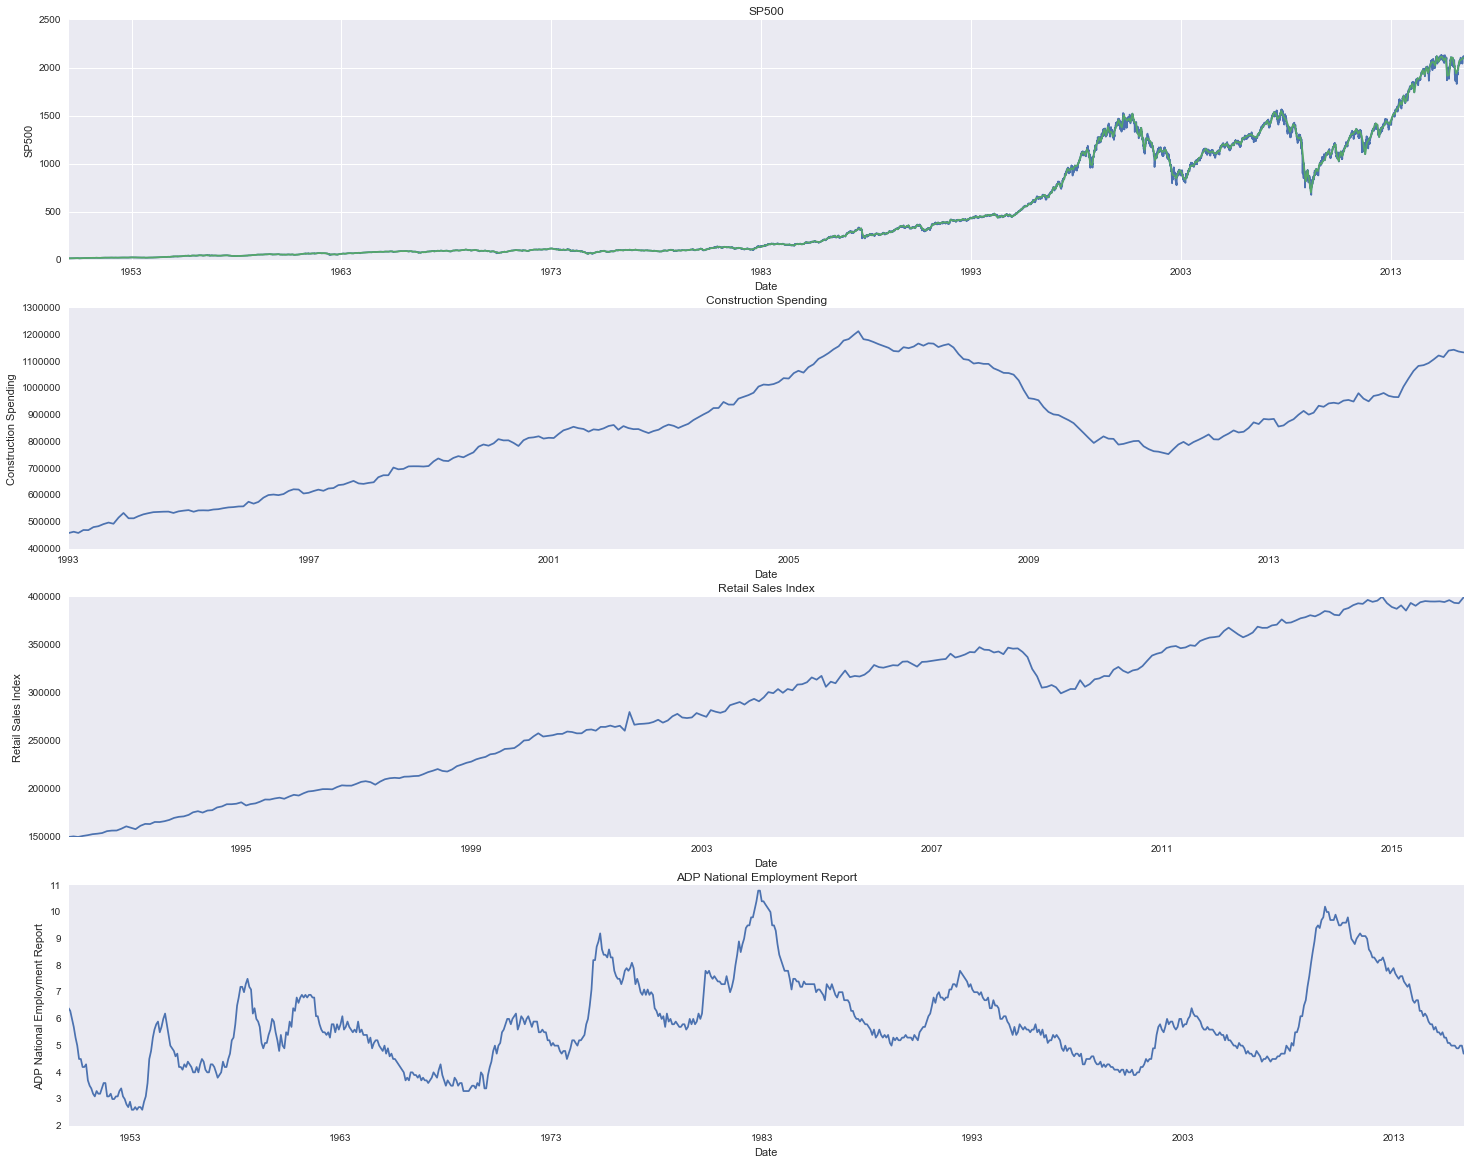

In [175]:
plt.figure(1, figsize=(25,25))


plt.subplot(511)
plt.xlabel('Date')
plt.ylabel('SP500')
plt.title('SP500')
plt.title('SP500')
SP500_daily = SP500.set_index(['Date'])
plt.plot(SP500_daily['Close'])
plt.plot(SP500_monthly['Close'])

plt.subplot(512)
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Construction Spending')
plt.title('Construction Spending')
plt.plot(CON_SPEND)

plt.subplot(513)
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Retail Sales Index')
plt.title('Retail Sales Index')
plt.plot(RET_SALES_IND)

plt.subplot(514)
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('ADP National Employment Report')
plt.title('ADP National Employment Report')
plt.plot(ADP_NER)

plt.show()

In [177]:
SP500_monthly.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000
1950-02-01,17.049999,17.049999,17.049999,17.049999,1810000,17.049999
1950-03-01,17.240000,17.240000,17.240000,17.240000,1410000,17.240000
1950-04-03,17.530001,17.530001,17.530001,17.530001,1570000,17.530001
1950-05-01,18.219999,18.219999,18.219999,18.219999,2390000,18.219999


In [197]:
SP500_monthly.index = SP500_monthly.index.map(lambda x: pd.to_datetime(str(x.year) + '-' + str(x.month) + '-01'))
SP500_monthly.head(20)

,Open,High,Low,Close,Volume,Adj Close,YearMonth
1950-01-01,16.660000,16.660000,16.660000,16.660000,1260000,16.660000,1950001
1950-02-01,17.049999,17.049999,17.049999,17.049999,1810000,17.049999,1950002
1950-03-01,17.240000,17.240000,17.240000,17.240000,1410000,17.240000,1950003
1950-04-01,17.530001,17.530001,17.530001,17.530001,1570000,17.530001,1950004
1950-05-01,18.219999,18.219999,18.219999,18.219999,2390000,18.219999,1950005
1950-06-01,18.770000,18.770000,18.770000,18.770000,1580000,18.770000,1950006
1950-07-01,17.639999,17.639999,17.639999,17.639999,1550000,17.639999,1950007
1950-08-01,18.020000,18.020000,18.020000,18.020000,1970000,18.020000,1950008
1950-09-01,18.549999,18.549999,18.549999,18.549999,1290000,18.549999,1950009
1950-10-01,19.690001,19.690001,19.690001,19.690001,2200000,19.690001,1950010


In [228]:
SP500_monthly['CON_SPEND'] = CON_SPEND
SP500_monthly['RET_SALES_IND'] = RET_SALES_IND
SP500_monthly['ADP_NER'] = ADP_NER
SP500_monthly['DGORDER'] = DGORDER
SP500_monthly['AMTMVS'] = AMTMVS
SP500_monthly['BOPGSTB'] = BOPGSTB
SP500_monthly['TOTALSL'] = TOTALSL
SP500_monthly['NAMP'] = NAPM
SP500_monthly['JTSJOL'] = JTSJOL
SP500_monthly['UMTMTI'] = UMTMTI
SP500_monthly['CPI'] = CPI
SP500_monthly['UMCSENT'] = UMCSENT
SP500_monthly['PPIACO'] = PPIACO
SP500_monthly['RLEARN'] = RLEARN
SP500_monthly['HOUST'] = HOUST
SP500_monthly['RSXFS'] = RSXFS
SP500_monthly['MSACSR'] = MSACSR
SP500_monthly['IC4WSA'] = IC4WSA
SP500_monthly['PSAVERT'] = PSAVERT
SP500_monthly['BUSLOANS'] = BUSLOANS
SP500_monthly['TDSP'] = TDSP
SP500_monthly['TCU'] = TCU
SP500_monthly['SFXRSA'] = SFXRSA


In [229]:
SP500_monthly.tail()

,Open,High,Low,Close,Volume,Adj Close,YearMonth,CON_SPEND,RET_SALES_IND,ADP_NER,...,RLEARN,HOUST,RSXFS,MSACSR,IC4WSA,PSAVERT,BUSLOANS,TDSP,TCU,SFXRSA
2016-02-01,1936.939941,1947.199951,1920.300049,1939.380005,4322530000,1939.380005,2016002,1.14397e+06,393591,4.9,...,NaN,1178,393591,5.6,NaN,5.4,2006.13,NaN,76.7,225.94
2016-03-01,1937.089966,1978.349976,1937.089966,1978.349976,4819750000,1978.349976,2016003,1.13749e+06,393137,5,...,NaN,1089,393137,5.8,NaN,5.4,2023.14,NaN,74.8,228.3
2016-04-01,2056.620117,2075.070068,2043.979980,2072.780029,3749990000,2072.780029,2016004,1.13393e+06,399320,5,...,NaN,1172,399320,4.7,NaN,5.4,2047.49,NaN,75.4,NaN
2016-05-01,2067.169922,2083.419922,2066.110107,2081.429932,3841110000,2081.429932,2016005,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,2053.27,NaN,NaN,NaN
2016-06-01,2093.939941,2100.969971,2085.100098,2099.330078,3525170000,2099.330078,2016006,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
SP_nullness = SP500_monthly.dropna()

In [231]:
SP_nullness

,Open,High,Low,Close,Volume,Adj Close,YearMonth,CON_SPEND,RET_SALES_IND,ADP_NER,...,RLEARN,HOUST,RSXFS,MSACSR,IC4WSA,PSAVERT,BUSLOANS,TDSP,TCU,SFXRSA
2005-01-01,1211.920044,1217.800049,1200.319946,1202.079956,1510800000,1202.079956,2005001,1.03619e+06,313730,5.2,...,336,2159,313730,4.4,328000,1,925.4,13.4,79,191.57
2005-10-01,1228.810059,1233.339966,1225.150024,1226.699951,2097490000,1226.699951,2005010,1.14566e+06,317010,5,...,332,2014,317010,4.5,397500,-0.7,1032.2,13.86,79.5,214.16
2006-04-01,1302.880005,1309.189941,1296.650024,1297.810059,2494080000,1297.810059,2006004,1.18348e+06,327475,4.7,...,329,1849,327475,6.3,300500,-1.6,1099.3,14.4,81.9,218.91
2006-07-01,1270.060059,1280.380005,1270.060059,1280.189941,1114470000,1280.189941,2006007,1.16509e+06,332418,4.8,...,334,1795,332418,7.3,310500,-0.9,1136.7,14.49,82.4,215.21
2011-01-01,1257.619995,1276.170044,1257.619995,1271.869995,4286670000,1271.869995,2011001,771982,342018,9,...,338,596,342018,7.2,410750,5.8,1225.6,11.51,76.1,135.64
2011-10-01,1131.209961,1138.989990,1098.920044,1099.229980,5670340000,1099.229980,2011010,798530,355840,9,...,335,628,355840,6.3,414000,3.5,1313.2,10.88,77.8,130.2


### not going to work

In [233]:
SP500_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 798 entries, 1950-01-01 to 2016-06-01
Data columns (total 30 columns):
Open             798 non-null float64
High             798 non-null float64
Low              798 non-null float64
Close            798 non-null float64
Volume           798 non-null int64
Adj Close        798 non-null float64
YearMonth        798 non-null int32
CON_SPEND        280 non-null object
RET_SALES_IND    292 non-null object
ADP_NER          796 non-null object
DGORDER          699 non-null object
AMTMVS           292 non-null object
BOPGSTB          292 non-null object
TOTALSL          795 non-null object
NAMP             796 non-null object
JTSJOL           185 non-null object
UMTMTI           292 non-null object
CPI              795 non-null object
UMCSENT          553 non-null object
PPIACO           795 non-null object
RLEARN           149 non-null object
HOUST            688 non-null object
RSXFS            292 non-null object
MSACSR           640 n

In [144]:
from pandas.tools.plotting import scatter_matrix